<a href="https://colab.research.google.com/github/arthurziegler/pytorch-deep-learning-course/blob/main/Notebooks/PyTorch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# we would like to generate 20 data points
N = 20

# random data on the x-axis in (-5, +5)
X = np.random.random(N)*10 - 5

# a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)

# you'll have to take my "in-depth" series to understand
# why this is the CORRECT model to use with our MSE loss

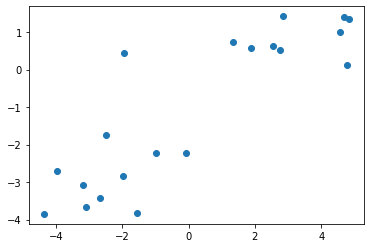

In [ ]:
# Plot the data
plt.scatter(X, Y);

In [ ]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [ ]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [ ]:
type(inputs)

torch.Tensor

In [ ]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
    
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 12.1352
Epoch 2/30, Loss: 2.8066
Epoch 3/30, Loss: 2.4554
Epoch 4/30, Loss: 2.1753
Epoch 5/30, Loss: 1.9483
Epoch 6/30, Loss: 1.7641
Epoch 7/30, Loss: 1.6148
Epoch 8/30, Loss: 1.4938
Epoch 9/30, Loss: 1.3956
Epoch 10/30, Loss: 1.3161
Epoch 11/30, Loss: 1.2515
Epoch 12/30, Loss: 1.1992
Epoch 13/30, Loss: 1.1568
Epoch 14/30, Loss: 1.1224
Epoch 15/30, Loss: 1.0945
Epoch 16/30, Loss: 1.0719
Epoch 17/30, Loss: 1.0536
Epoch 18/30, Loss: 1.0387
Epoch 19/30, Loss: 1.0266
Epoch 20/30, Loss: 1.0169
Epoch 21/30, Loss: 1.0090
Epoch 22/30, Loss: 1.0025
Epoch 23/30, Loss: 0.9973
Epoch 24/30, Loss: 0.9931
Epoch 25/30, Loss: 0.9897
Epoch 26/30, Loss: 0.9869
Epoch 27/30, Loss: 0.9846
Epoch 28/30, Loss: 0.9828
Epoch 29/30, Loss: 0.9813
Epoch 30/30, Loss: 0.9801


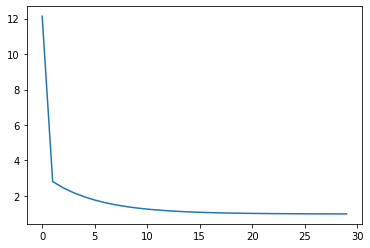

In [ ]:
# Plot the loss per iteration
plt.plot(losses);

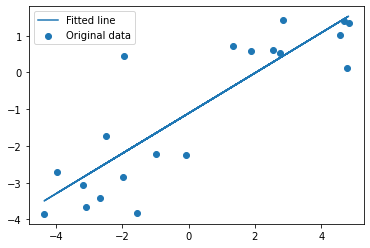

In [ ]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
# Error!
model(inputs).numpy()

RuntimeError: ignored

In [ ]:
# Another way
with torch.no_grad():
  out = model(inputs).numpy()
out

In [ ]:
# Important!
# In order to test the efficacy of our model, synthetic data is useful
# Why?
# Because ***we know the answer***
# True values of (w, b) are (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)